          PC1       PC2
0    0.102593 -0.829562
1   -0.040133 -0.770644
2   -0.037532 -0.790725
3   -0.046404 -0.793948
4   -0.015392 -0.764792
..        ...       ...
174  4.901751 -0.866004
175  5.759641 -1.308838
176  3.746537  1.145021
177  5.433919 -0.839261
178  4.837667  0.870165

[179 rows x 2 columns]


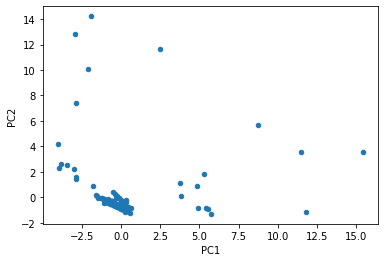

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

dataA = pd.read_csv('../5. Dataset PCA/MeterC_pca_all.csv')
dataA_feature = dataA[['PC1','PC2']]
print(dataA_feature)
_ = dataA_feature.plot.scatter(x='PC1',y='PC2')

In [2]:
# scaler = MinMaxScaler()
# scaler.fit(dataA_feature.PC1)
# dataA_feature.PC1 = scaler.transform(dataA_feature.PC1)

# # scaler.fit(dataA_feature['PC2'])
# # dataA_feature['PC2'] = scaler.transform(dataA_feature['PC2'])
# dataA_feature

In [3]:
km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [4]:
y_predict = km.fit_predict(dataA_feature[['PC1','PC2']])
dataA_feature['Cluster'] = y_predict+1
dataA_feature

<ipython-input-4-9ea8584dc15b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataA_feature['Cluster'] = y_predict+1


,PC1,PC2,Cluster
0,0.102593,-0.829562,1
1,-0.040133,-0.770644,1
2,-0.037532,-0.790725,1
3,-0.046404,-0.793948,1
4,-0.015392,-0.764792,1
...,...,...,...
174,4.901751,-0.866004,4
175,5.759641,-1.308838,4
176,3.746537,1.145021,4
177,5.433919,-0.839261,4


In [5]:
km.cluster_centers_

array([[-4.89937309e-01, -4.18651362e-01],
       [ 1.18523696e+01,  2.89535959e+00],
       [-1.46880190e+00,  1.12548515e+01],
       [ 4.91304691e+00, -4.27190606e-03]])

No handles with labels found to put in legend.


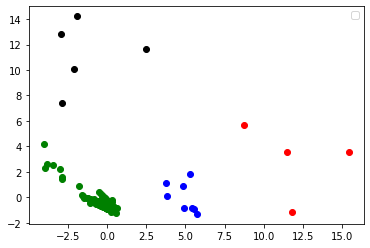

In [6]:
df1 = dataA_feature[dataA_feature.Cluster==1]
df2 = dataA_feature[dataA_feature.Cluster==2]
df3 = dataA_feature[dataA_feature.Cluster==3]
df4 = dataA_feature[dataA_feature.Cluster==4]
plt.scatter(df1['PC1'],df1['PC2'],color='green')
plt.scatter(df2['PC1'],df2['PC2'],color='red')
plt.scatter(df3['PC1'],df3['PC2'],color='black')
plt.scatter(df4['PC1'],df4['PC2'],color='blue')
plt.legend()

In [7]:
k_rng = range(1,10)
sse=[]
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dataA_feature[['PC1','PC2']])
    sse.append(km.inertia_)

C:\Users\joshh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
sse

[1792.5766502100491,
 1064.3026520871763,
 443.4322144028685,
 292.6000490800121,
 171.08598306720154,
 132.48336992781677,
 108.28416237456786,
 90.06140585639234,
 67.78814181345234]

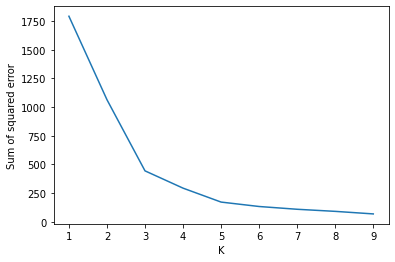

In [9]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)